# Pesquisa Nacional de Saúde do Escolar - PENSE 2015

In [1]:
!pip install plotly==4.12.0

     |████████████████████████████████| 13.1MB 258kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Parte 1 - Educação, saúde e tipos de dados

In [3]:
import pandas as pd
from  zipfile import ZipFile

path = '/content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015_AMOSTRA2.zip'
arquivo_zipado = ZipFile(path)

path_on_zip = arquivo_zipado.namelist()[1]
dados = pd.read_csv(arquivo_zipado.open(path_on_zip), sep=';', thousands = ".", decimal = ",")

dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [4]:
arquivo_zipado.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [5]:
dados.shape

(16556, 181)

In [6]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [8]:
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### Desafios



*   Desafio 1: descompactar a pasta zipada usando outro método
    *  utilizar comando bash com !
*   Desafio 2: estudar sobre a base de dados que vamos trabalhar
*   Desafio 3: Analisar o dicionário de dados e classificar algumas perguntas como qualitativa vs quantitativa e sub classificações (ordinal, nominal e etc).



#### Desafio 1 - Usando comandos bash

In [9]:
!unzip '/content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015_AMOSTRA2.zip' -d '/content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015'

Archive:  /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015_AMOSTRA2.zip
   creating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos csv/
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV  
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV  
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV  
   creating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos sas/
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos sas/pense_amostra2_aluno.sas7bdat  
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/arquivos sas/pense_amostra2_alunoescola.sas7bdat  
  inflating: /content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015/a

In [10]:
!rm '/content/drive/MyDrive/Colab Datasets/Bootcamp Alura 2020/PeNSE_2015' -r

#### Desafios 2 e 3 - Analisar variáveis qualitativas vs quantitativas

1. **Qualitativas**
    *   Contínuas: peso do estudante (VB17003), altura do estudante (VB17004).
    *   Discretas: quantas pessoas moram na sua casa (VB01010A), quantos banheiros com chuveiro tem na sua casa (VB01019), idade de quando fumou a primeira vez (VB04002).

2. **Quantitativas**
   *   Nominais: sexo (VB01001), cor/raça (VB01002), qual turno estuda (VB01022).
   *   Ordinais: mês de aniversário (VB01004), grau de escolaridade mais elevado que pretende concluir (VB01025), quantos dias usou maconha nos últimos 30 dias (VB06004A).

## Parte 2 - Dados qualitativos e tabelas de frequência

In [11]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [12]:
dados['VB01001'].value_counts(normalize=True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [13]:
freq = dados['VB11007'].value_counts()
freq

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [14]:
percent = dados['VB11007'].value_counts(normalize=True) * 100
percent

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [15]:
respostas = {
    1: 'Muito satisfeito',
    2: 'Satisfeito',
    3: 'Indiferente',
    4: 'Insatisfeito',
    5: 'Muito insatisfeito',
    99: 'Não informado'
}

dist_freq = pd.DataFrame({'Frequência': freq,
                          'Percentual': percent})
dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis('Sentimento em relação ao seu corpo', axis=1, inplace=True)

dist_freq

Sentimento em relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito,714,4.312636
Não informado,181,1.093259


### Desafio - Criar função p/ tabelas de frequência

* Desafio 4: Criar uma função para gerar as tabelas de frequência e fazer análise de outras informações com essa função

In [16]:
def criar_tab_freq(dataset, coluna, descricao_coluna, respostas = None):
    freq = dataset[coluna].value_counts()
    percent = dataset[coluna].value_counts(normalize=True) * 100

    dist_freq = pd.DataFrame({'Frequência': freq,
                          'Percentual': percent})
    if respostas != None:
        dist_freq.rename(index = respostas, inplace = True)
    dist_freq.rename_axis(descricao_coluna, axis=1, inplace=True)

    return dist_freq

In [17]:
respostas = {
    1:	'Nenhum dia',
    2:	'1 dia',
    3:	'2 dias',
    4:	'3 dias',
    5:	'4 dias',
    6:	'5 dias',
    7:	'5 dias mais sábado',
    8:	'5 dias mais sábado e domingo',
    99: 'Não informado'
}

educacao_fisica_freq = criar_tab_freq(dados, 'VB03003A', 'Frequência semanal de aulas de educação física', respostas)
educacao_fisica_freq

Frequência semanal de aulas de educação física,Frequência,Percentual
1 dia,6569,39.677458
2 dias,4858,29.342836
Nenhum dia,3240,19.569944
3 dias,982,5.931384
5 dias,348,2.101957
4 dias,261,1.576468
5 dias mais sábado e domingo,139,0.839575
5 dias mais sábado,107,0.646291
Não informado,52,0.314086


In [18]:
respostas = {
    1:	'Nenhum dia',
    2:	'1 dia',
    3:	'2 dias',
    4:	'3 dias',
    5:	'4 dias',
    6:	'5 dias',
    7:	'5 dias mais sábado',
    8:	'5 dias mais sábado e domingo',
    99: 'Não informado'
}

descricao = 'Frequência semanal de volta da escola a pé/bicicleta'
volta_escola = criar_tab_freq(dados, 'VB03001A2', descricao, respostas)
volta_escola

Frequência semanal de volta da escola a pé/bicicleta,Frequência,Percentual
Nenhum dia,7505,45.330998
5 dias,4488,27.107997
5 dias mais sábado e domingo,1375,8.305146
5 dias mais sábado,980,5.919304
1 dia,884,5.339454
2 dias,467,2.820730
3 dias,441,2.663687
4 dias,370,2.234839
Não informado,46,0.277845


In [19]:
respostas = {
    -1:	'Pulo no questionário',
    1: 'Nenhum dia',
    2:	'1 ou 2 dias',
    3:	'3 a 5 dias',
    4:	'6 a 9 dias',
    5:	'10 ou mais',
    99: 'Não informado'
}

descricao = 'Frequência mensal de uso de drogas'
uso_drogas = criar_tab_freq(dados, 'VB06003A', descricao, respostas)
uso_drogas

Frequência mensal de uso de drogas,Frequência,Percentual
Pulo no questionário,15117,91.308287
Nenhum dia,797,4.813965
1 ou 2 dias,318,1.920754
10 ou mais,155,0.936216
3 a 5 dias,99,0.597971
6 a 9 dias,62,0.374487
Não informado,8,0.048321


## Parte 3 - Frequência em dados contínuos e pandas CrossTab

In [20]:
dados['VB17004']

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

In [21]:
dados['IMC'] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [22]:
classes = [ 0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes,
       labels = labels,
       include_lowest = True)

dados[['IMC', 'CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [23]:
descricao = 'Classe IMC'
classe_imc = criar_tab_freq(dados, 'CLASSE_IMC', descricao)
classe_imc

Classe IMC,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


In [24]:
import numpy as np

tam_amostra = len(dados)
k = int(1 + ((10/3)*np.log10(tam_amostra)))

k

15

In [25]:
dados['CLASSE_ALTURA'] = pd.cut(
    x = dados['VB17004'],
    bins = k,
    include_lowest = True)

classe_altura = criar_tab_freq(dados, 'CLASSE_ALTURA', 'Classe Altura')
classe_altura

Classe Altura,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [26]:
respostas = {
    1: 'Muito satisfeito',
    2: 'Satisfeito',
    3: 'Indiferente',
    4: 'Insatisfeito',
    5: 'Muito insatisfeito',
    99: 'Não informado'
}

# considerando a população total pelas linhas E colunas
freq_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize = True,
                           rownames=['Satisfação com o próprio corpo'],
                           colnames=['Sexo']) * 100
freq_cruzada.rename(index = respostas, inplace = True)
freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
freq_cruzada

Sexo,Masculino,Feminino
Satisfação com o próprio corpo,,
Muito satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito insatisfeito,1.570428,2.742208
Não informado,0.718773,0.374487


In [27]:
fig = freq_cruzada.plot(backend='plotly', kind='bar')


fig.update_layout(
    title_text = 'PeNSE - Pesquisa Nacional de Saúde do Escolar<br /><b>O quão satisfeito você está com o seu corpo?</b>',
    xaxis_title_text = 'Grau de satisfação',
    yaxis_title_text = '% de escolares que responderam',
    legend_title_text = 'Sexo do escolar',
    template = 'plotly_white',
    autosize = False,
    width = 800,
    height = 600
)

fig.show()

In [28]:
# considerando a população total pela coluna
freq_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'],
                           normalize = 'columns',
                           rownames=['Satisfação com o próprio corpo'],
                           colnames=['Sexo']) * 100
freq_cruzada.rename(index = respostas, inplace = True)
freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
freq_cruzada

Sexo,Masculino,Feminino
Satisfação com o próprio corpo,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito insatisfeito,3.137444,5.490386
Não informado,1.435984,0.749788


In [29]:
# considerando a população total pela linha/index
freq_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'],
                           normalize = 'index',
                           rownames=['Satisfação com o próprio corpo'],
                           colnames=['Sexo']) * 100
freq_cruzada.rename(index = respostas, inplace = True)
freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
freq_cruzada

Sexo,Masculino,Feminino
Satisfação com o próprio corpo,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito insatisfeito,36.414566,63.585434
Não informado,65.745856,34.254144


### Desafios

* Desafio 5: Criar uma tabela de frequência para o peso
* Desafio 6: Criar outros crosstabs para analisar, pesquisar sobre o parâmetro **affunc** e testá-lo

#### Desafio 5 - Tabela de frequência para o peso

In [30]:
dados['CLASSE_PESO'] = pd.cut(
    x = dados['VB17003'],
    bins = k,
    include_lowest = True)

classe_peso = criar_tab_freq(dados, 'CLASSE_PESO', 'Classe Peso')
classe_peso

Classe Peso,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


#### Desafio 6 - Outros Crosstabs

In [31]:
# cruzamento de sexo com região
freq_cruzada = pd.crosstab(dados['REGEOGR'], dados['VB01001'], normalize = True,
                           rownames=['Região'],
                           colnames=['Sexo']) * 100
freq_cruzada.rename(index = {
        1: 'Norte',
        2: 'Nordeste',
        3: 'Sudeste',
        4: 'Sul',
        5: 'Centro-Oeste'
    }, inplace = True)
freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
freq_cruzada

Sexo,Masculino,Feminino
Região,,
Norte,9.525248,9.730611
Nordeste,10.171539,10.757429
Sudeste,9.923895,9.863494
Sul,10.237980,9.132641
Centro-Oeste,10.195699,10.461464


In [32]:
# cruzamento de sexo com cor/raça com a média de altura
freq_cruzada = pd.crosstab(dados['VB01002'], dados['VB01001'],
                           values=dados['VB17004'], aggfunc = 'mean',
                           rownames=['Cor/Raça'],
                           colnames=['Sexo']).round(2)
freq_cruzada.rename(index = {
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indígena',
        99: 'Não informado'
    }, inplace = True)
freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
freq_cruzada

Sexo,Masculino,Feminino
Cor/Raça,,
Branca,164.09,157.44
Preta,164.41,157.44
Amarela,162.55,158.20
Parda,163.86,157.76
Indígena,160.77,155.80
Não informado,162.17,154.94


## Parte 4 - Histograma e Boxplot

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

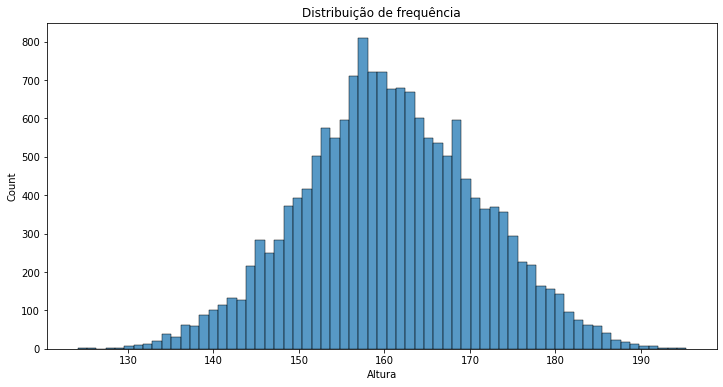

In [34]:
ax = sns.histplot(x = 'VB17004', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax

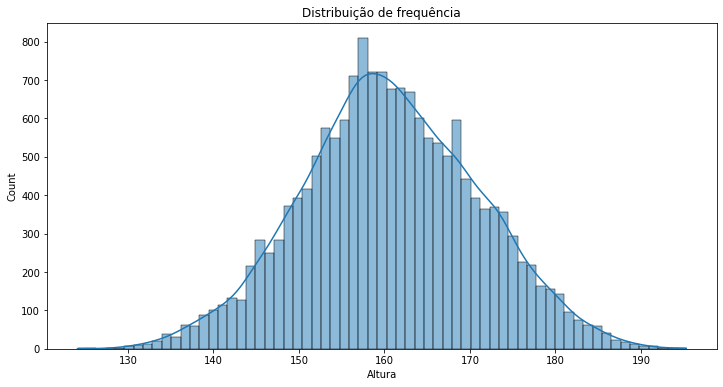

In [35]:
ax = sns.histplot(x = 'VB17004', data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax

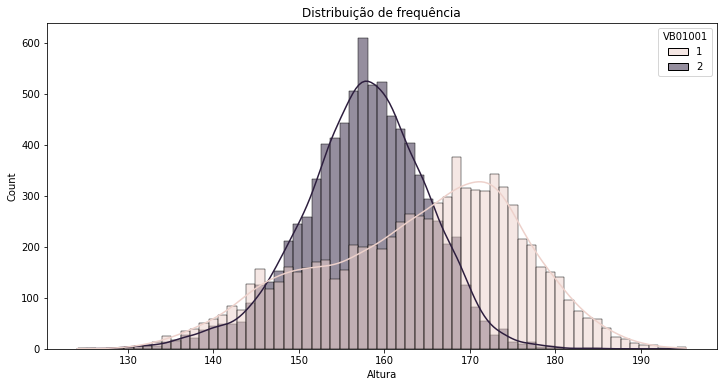

In [36]:
ax = sns.histplot(x = 'VB17004', data = dados, kde = True, hue = 'VB01001')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax

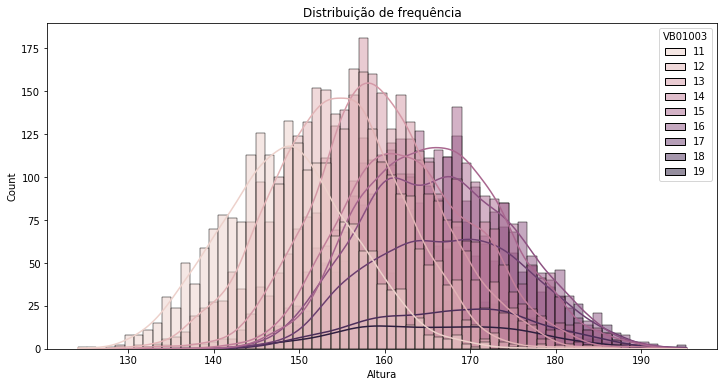

In [37]:
ax = sns.histplot(x = 'VB17004', data = dados, kde = True, hue = 'VB01003')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax;

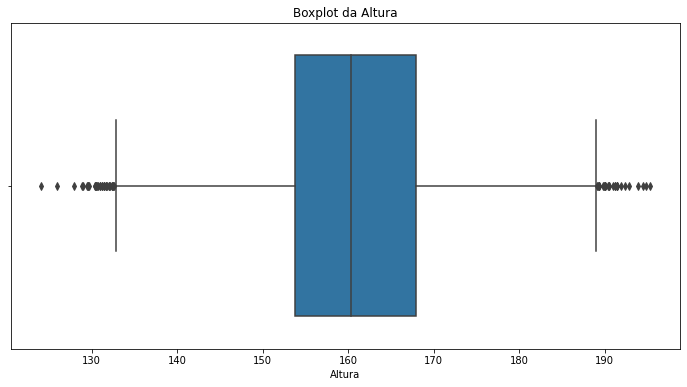

In [38]:
ax = sns.boxplot(x = 'VB17004', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da Altura')
ax.set_xlabel('Altura')
ax;

In [39]:
dados['VB17004'].quantile(0.25)

153.8

In [40]:
dados['VB17004'].quantile(0.5)

160.4

In [41]:
dados['VB17004'].quantile(0.75)

167.9

In [42]:
dados['VB17004'].min()

124.1

In [43]:
dados['VB17004'].max()

195.3

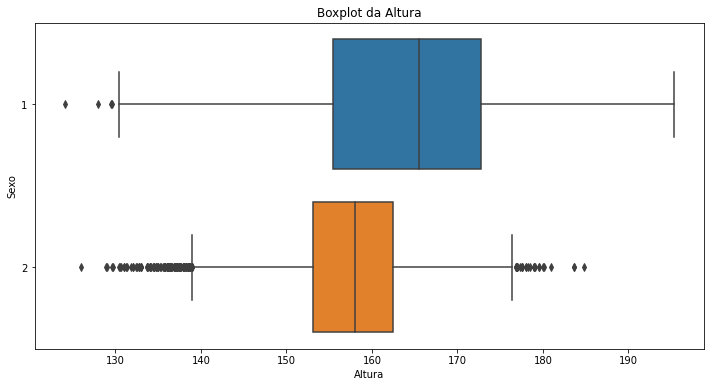

In [44]:
ax = sns.boxplot(x = 'VB17004', y = 'VB01001', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da Altura')
ax.set_xlabel('Altura')
ax.set_ylabel('Sexo')
ax;

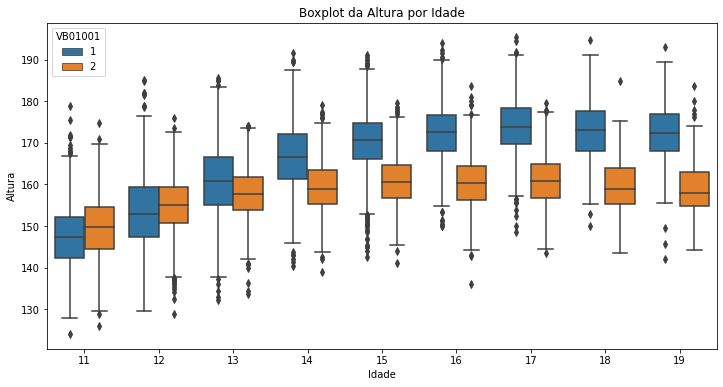

In [45]:
ax = sns.boxplot(x = 'VB01003', y = 'VB17004', hue = 'VB01001', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da Altura por Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

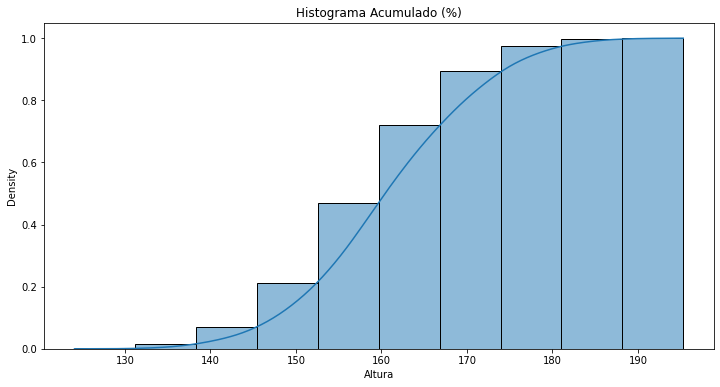

In [46]:
ax = sns.histplot(x = 'VB17004', data = dados, kde = True, cumulative = True,
                  stat = 'density', bins = 10)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma Acumulado (%)')
ax.set_xlabel('Altura')
ax;

#### Desafios

* Desafio 7: Calcular desvio padrão, média, moda e mediana e plotar no gráfico
* Desafio 8: Fazer a análise com o histograma para outras informações da base de dados
* Desafio 9: Pesquisar como é determinado os outliers no boxplot do Seaborn

##### Desafio 7 - Calcular outras medidas

In [47]:
moda = dados['VB17004'].mode()
desvio_padrao = dados['VB17004'].std()
media = dados['VB17004'].mean()
mediana = dados['VB17004'].median()

print(f'Desvio padrão = {desvio_padrao} || Média = {media} || Mediana = {mediana} || Moda = {moda[0]}.')

Desvio padrão = 10.3400702338278 || Média = 160.71311307078818 || Mediana = 160.4 || Moda = 160.0.


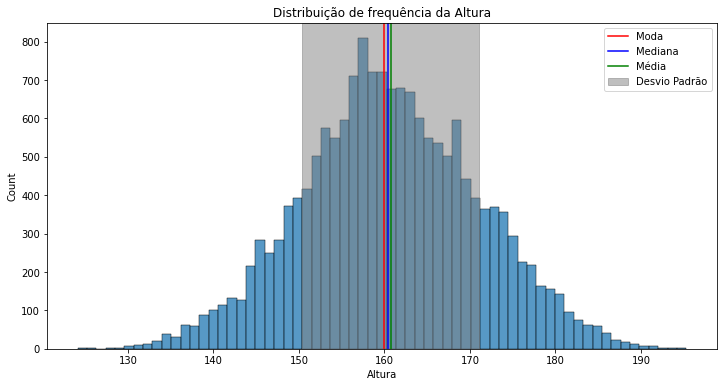

In [48]:
ax = sns.histplot(x = 'VB17004', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência da Altura')
ax.set_xlabel('Altura')

#acrescentando moda, mediana e média
plt.axvline(x=moda[0], color='red', label='Moda')
plt.axvline(x=mediana, color='blue', label='Mediana')
plt.axvline(x=media, color='green', label='Média')

# acrescentando a faixa com o desvio padrão
ax.axvspan(media-desvio_padrao, media+desvio_padrao, alpha=0.5,
           color='gray', label='Desvio Padrão')

ax.legend()

ax;

##### Desafio 8 - Outros histogramas

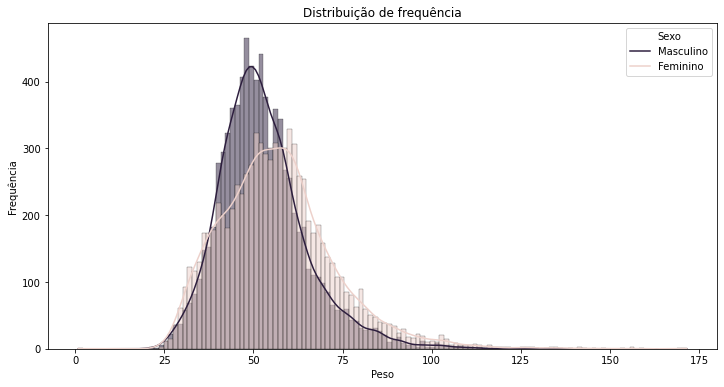

In [49]:
# sexo vs peso
ax = sns.histplot(x = 'VB17003', data = dados, kde = True, hue = 'VB01001')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Peso')
ax.set_ylabel('Frequência')

# acertando a legenda
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])

ax;

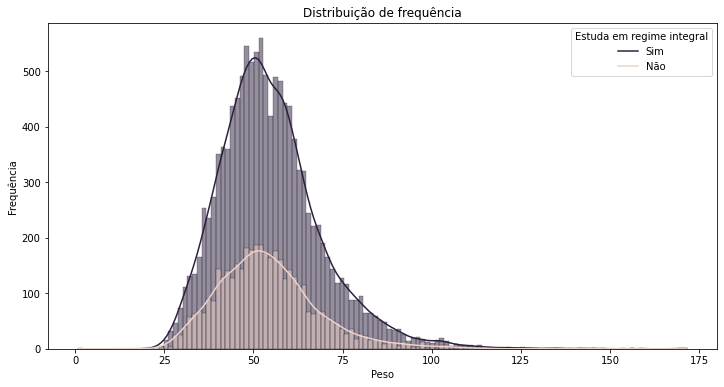

In [50]:
# peso vs regime integral
dados_filtrados = dados.query('VB01023 != 99')

ax = sns.histplot(x = 'VB17003', data = dados_filtrados, kde = True, hue = 'VB01023')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Peso')
ax.set_ylabel('Frequência')

# acertando a legenda
plt.legend(title='Estuda em regime integral', labels=['Sim', 'Não'])

ax;

##### Desafio 9 - Entendendo como os outliers são calculados

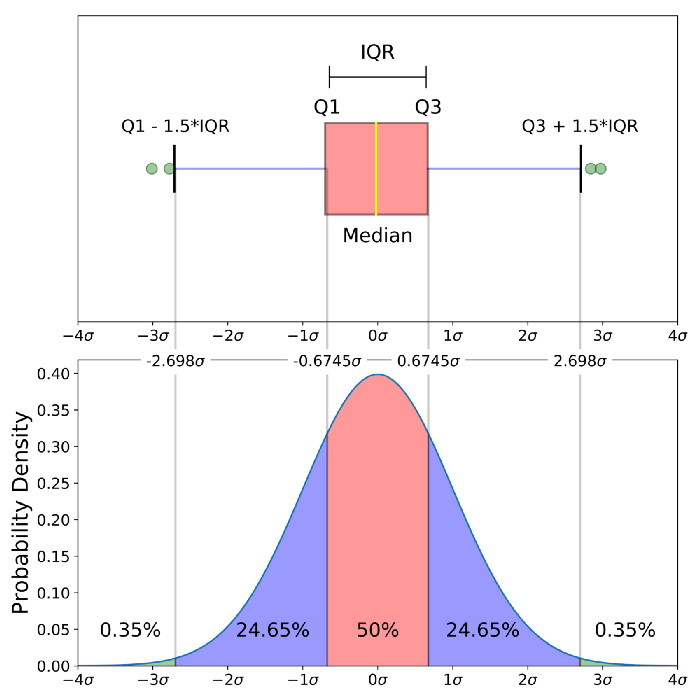

## Parte 05 - Medidas de centralidade e dispersão

In [51]:
dados['VB17004'].mode()

0    160.0
dtype: float64

In [52]:
dados['VB17004'].mean()

160.71311307078818

In [53]:
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [54]:
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [55]:
media_altura = dados['VB17004'].mean()
dados['MEDIA_ALTURA'] = media_altura
diff = dados['VB17004'] - media_altura
dados['DIFERENCA_MEDIA'] = diff
diff_quadrado = diff**2
dados['DIFERENCA_QUADRADO'] = diff_quadrado

dados[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA', 'DIFERENCA_QUADRADO']]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [56]:
# variância
variancia_amostral = (1/(len(dados)-1)) * dados['DIFERENCA_QUADRADO'].sum()
variancia_amostral

106.91705244049119

In [57]:
dados['VB17004'].mean()

160.71311307078818

In [58]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

### Desafios

* Desafio 10: Fazer a descrição de outras variáveis, analisar e compartilhar suas análises no discord
* Desafio 11: Fazer o cálculo da média da altura por sexo e idade, através do crosstab
* Desafio 12: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os cálculos para as outras colunas numéricas (peso, IMC e etc)

* Super desafio 1: Criar um dicionário para facilitar a busca da pergunta
* Super desafio 2: De alguma maneira, sumarizar as perguntas (em tags) para ficar mais curta. (dica: NLTK, GENSIM)

#### Desafio 10 - Outra variáveis

**Altura, Peso, IMC e Idade** para cada Sexo

```
altura = VB17004
peso = VB17003
idade = VB01003
sexo = VB01001
```



In [59]:
imc = pd.DataFrame(dados.groupby(['VB01001', 'VB01003'], as_index=False)['IMC'].mean().round(2))
imc.columns = ['Sexo', 'Idade', 'Média de IMC']
imc['Sexo'] = imc['Sexo'].replace([1,2], ['Masculino', 'Feminino'])

imc

,Sexo,Idade,Média de IMC
0,Masculino,11,19.31
1,Masculino,12,19.68
2,Masculino,13,20.07
3,Masculino,14,20.77
4,Masculino,15,21.41
5,Masculino,16,21.69
6,Masculino,17,22.40
7,Masculino,18,22.48
8,Masculino,19,23.29
9,Feminino,11,19.19


In [60]:
fig = imc.plot(backend='plotly', kind='bar',
         x='Idade', y='Média de IMC', color='Sexo', text='Média de IMC',
         barmode='group')

fig.update_xaxes(dtick=1)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title_text = 'PeNSE - Pesquisa Nacional de Saúde do Escolar<br /><b>Média de IMC por Sexo e Idade</b>',
    xaxis_title_text = 'Idade',
    yaxis_title_text = 'Média de IMC',
    legend_title_text = 'Sexo do escolar',
    template = 'plotly_white',
    autosize = False,
    width = 800,
    height = 600
)

fig.show()


Conseguimos ver acima que a média de IMC cresce junto com a idade e que essa média é quase sempre maior para mulheres, exceto na idade de 11 anos.

**Média de IMC e Satisfação** para cada Sexo

```
satisfação com o corpo = VB11007
sexo = VB01001
```



In [61]:
imc_by_satisfacao = pd.DataFrame(dados.groupby(['VB01001', 'VB11007'], as_index=False)['IMC'].mean().round(2))

imc_by_satisfacao['VB01001'] = imc_by_satisfacao['VB01001'].replace([1,2], ['Masculino', 'Feminino'])
imc_by_satisfacao['VB11007'] = imc_by_satisfacao['VB11007'].replace(
    [1,2,3,4,5,99], ['Muito satisfeito(a)',
                     'Satisfeito(a)',
                     'Indiferente',
                     'Insatisfeito(a)',
                     'Muito insatisfeito(a)',
                     'Não informado'])

imc_by_satisfacao

,VB01001,VB11007,IMC
0,Masculino,Muito satisfeito(a),19.85
1,Masculino,Satisfeito(a),20.66
2,Masculino,Indiferente,21.94
3,Masculino,Insatisfeito(a),23.03
4,Masculino,Muito insatisfeito(a),22.48
5,Masculino,Não informado,20.49
6,Feminino,Muito satisfeito(a),19.86
7,Feminino,Satisfeito(a),20.55
8,Feminino,Indiferente,21.94
9,Feminino,Insatisfeito(a),22.66


In [62]:
fig = imc_by_satisfacao.plot(backend='plotly', kind='bar',
         x='VB11007', y='IMC', color='VB01001', text='IMC',
         barmode='group')

fig.update_xaxes(dtick=1)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title_text = 'PeNSE - Pesquisa Nacional de Saúde do Escolar<br /><b>Média de IMC por Sexo e Satisfação com o corpo</b>',
    xaxis_title_text = 'Satisfação com o próprio corpo',
    yaxis_title_text = 'Média de IMC',
    legend_title_text = 'Sexo do escolar',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)

fig.show()

Conseguimos ver acima que quanto mais insatisfeito com o próprio corpo, maior é a média de IMC. Além disso, exceto para os graus de insatisfeito e muito insatisfeito, a média de IMC é praticamente a mesma para ambos os sexos.

#### Desafio 11 - Média da altura usando o Crosstab

In [63]:
freq_cruzada.index

Index(['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Não informado'], dtype='object', name='Cor/Raça')

In [64]:
freq_cruzada = pd.crosstab(dados['VB01003'], dados['VB01001'],
                           values=dados['VB17004'], aggfunc = 'mean',
                           rownames=['Idade'],
                           colnames=['Sexo']).round(2)

freq_cruzada.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)

freq_cruzada

Sexo,Masculino,Feminino
Idade,,
11,147.62,149.52
12,153.70,154.97
13,160.72,157.67
14,166.41,159.34
15,170.34,160.76
16,172.42,160.39
17,173.81,160.91
18,173.02,159.44
19,172.14,158.98


#### Desafio 12 - Medidas de Dispersão



---


**Amplitude**

Diferença entre a maior e a menor observação de um conjunto de dados.

```
A = max() - min()
```

---
**Variância**

Média dos quadrados das diferenças entre cada uma das observações e a média aritmética da amostra.

O cálculo é feito com base na seguinte fórmula:

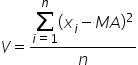

```
V: variância
Xi: valor observado
MA: média aritmética da amostra
n: número de dados observados
```

---

**Coeficiente de Variação**

Multiplicação do desvio padrão por 100, dividido pela média. Essa medida é expressa em porcentagem.


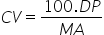

```
DP: desvio padrão
MA: média
```


Vamos agora calcular essas medidas para algumas informações numéricas como altura, peso, idade e IMC.

In [65]:
# Altura VB17004
amp = dados["VB17004"].max() - dados["VB17004"].min()
var = dados["VB17004"].var()
cofvar = (100*dados["VB17004"].std())/dados["VB17004"].mean()
print(f'Para a Altura:\n   + amplitude: {amp:.2f}\n   + variância: {var:.2f}\n'\
      f'   + coeficiente de variação: {cofvar:.2f}\n\n')


# Peso VB17003
amp = dados["VB17003"].max() - dados["VB17003"].min()
var = dados["VB17003"].var()
cofvar = (100*dados["VB17003"].std())/dados["VB17003"].mean()
print(f'Para o Peso:\n   + amplitude: {amp:.2f}\n   + variância: {var:.2f}\n'\
      f'   + coeficiente de variação: {cofvar:.2f}\n\n')


# Idade VB01001
amp = dados["VB01001"].max() - dados["VB01001"].min()
var = dados["VB01001"].var()
cofvar = (100*dados["VB01001"].std())/dados["VB01001"].mean()
print(f'Para a Idade:\n   + amplitude: {amp:.2f}\n   + variância: {var:.2f}\n'\
      f'   + coeficiente de variação: {cofvar:.2f}\n\n')

# IMC
amp = dados["IMC"].max() - dados["IMC"].min()
var = dados["IMC"].var()
cofvar = (100*dados["IMC"].std())/dados["IMC"].mean()
print(f'Para o IMC:\n   + amplitude: {amp:.2f}\n   + variância: {var:.2f}\n'\
      f'   + coeficiente de variação: {cofvar:.2f}')

Para a Altura:
   + amplitude: 71.20
   + variância: 106.92
   + coeficiente de variação: 6.43


Para o Peso:
   + amplitude: 170.70
   + variância: 211.64
   + coeficiente de variação: 26.59


Para a Idade:
   + amplitude: 1.00
   + variância: 0.25
   + coeficiente de variação: 33.35


Para o IMC:
   + amplitude: 57.08
   + variância: 18.02
   + coeficiente de variação: 20.25


#### Super desafio 1 - Dicionário das perguntas

In [66]:
import csv
import requests

In [67]:
def isInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [70]:
# inicializando variáveis
dicio_pense = {}
codigo = ''
pergunta = ''
chave = ''                
respostas = {}

url = 'https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_03/Dicionario_PENSE_Microdados_AMOSTRA2_filtrado.csv?raw=true'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=';', )
    
    for row in cr:
        if not isInt(row[0]): # checando se é um nome de coluna            
            dicio_pense[chave
                        ] = {
                'codigo': codigo,
                'pergunta': pergunta,
                'respostas': respostas
            }

            # adicionou as infos da coluna ao dicionário,
            # reinicializa as variáveis            
            codigo = row[0].strip()
            pergunta = row[1].strip()
            chave = row[2].strip()
            respostas = {}

        else:
            respostas[int(row[0].strip())] = row[1].strip()

In [72]:
dicio_pense['cor_raca']

{'codigo': 'VB01002',
 'pergunta': 'Qual é a sua cor ou raça?',
 'respostas': {1: 'Branca',
  2: 'Preta',
  3: 'Amarela',
  4: 'Parda',
  5: 'Indígena',
  99: 'Não informado'}}

In [73]:
dicio_pense['regiao']

{'codigo': 'REGEOGR',
 'pergunta': 'Região geográfica',
 'respostas': {1: 'Norte',
  2: 'Nordeste',
  3: 'Sudeste',
  4: 'Sul',
  5: 'Centro-Oeste'}}

In [104]:
dicio_pense['idade_bebeu_primeira_vez']

{'codigo': 'VB05003',
 'pergunta': 'Que idade você tinha quando tomou a primeira dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)',
 'respostas': {-1: 'Pulo no questionário',
  1: 'Nunca tomei bebida alcoólica',
  7: '7 anos ou menos',
  8: '8 anos',
  9: '9 anos',
  10: '10 anos',
  11: '11 anos',
  12: '12 anos',
  13: '13 anos',
  14: '14 anos',
  15: '15 anos',
  16: '16 anos',
  17: '17 anos',
  18: '18 anos ou mais',
  99: 'Não informado'}}

In [74]:
def get_coluna_by_cod(codigo):
    for key, val in dicio_pense.items():
        if val['codigo'] == codigo:
            return key, val

    return None

# atualizando a função que gera a tabela de frequência
def criar_tab_freq(dataset, cod_coluna):
    pergunta, coluna = get_coluna_by_cod(cod_coluna)

    freq = dataset[cod_coluna].value_counts()
    percent = dataset[cod_coluna].value_counts(normalize=True) * 100

    dist_freq = pd.DataFrame({'Frequência': freq,
                          'Percentual': percent})
    if coluna != None:
        respostas = coluna['respostas'] ## AQUI NÃO ESTÁ MAIS O PROBLEMA
        dist_freq.rename(index = respostas, inplace=True)
        dist_freq.rename_axis(pergunta, axis=1, inplace=True)

    return dist_freq

In [75]:
criar_tab_freq(dados, 'VB01001')

sexo,Frequência,Percentual
Masculino,8287,50.054361
Feminino,8269,49.945639


In [76]:
criar_tab_freq(dados, 'VB06003A')

frequencia_drogas,Frequência,Percentual
Pulo no questionário,15117,91.308287
Nenhum dia nos últimos 30 dias (0 dia),797,4.813965
1 ou 2 dias nos últimos 30 dias,318,1.920754
10 ou mais dias nos últimos 30 dias,155,0.936216
3 a 5 dias nos últimos 30 dias,99,0.597971
6 a 9 dias nos últimos 30 dias,62,0.374487
Não informado,8,0.048321


#### Super desafio 2 - Usando NLP

Pesquisar: NLTK, GENSIM

##### Testando o NLTK

In [77]:
import nltk    
nltk.download(['averaged_perceptron_tagger','floresta','mac_morpho',
               'machado','punkt','stopwords','wordnet','words'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Unzipping corpora/floresta.zip.
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [78]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [79]:
def sumarize_with_nltk(texto):
    sentencas = sent_tokenize(texto)
    palavras = word_tokenize(texto.lower())

    stopwords_ptbr = set(stopwords.words('portuguese') + list(punctuation))
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords_ptbr]

    return palavras_sem_stopwords

In [80]:
texto = 'Qual é a sua cor ou raça?'
print(sumarize_with_nltk(texto))

texto = 'Alguma vez na vida você foi forçado a ter relação sexual?'
print(sumarize_with_nltk(texto))

texto = 'qual foi a principal causa do ferimento ou da lesão mais séria que aconteceu com você?'
print(sumarize_with_nltk(texto))

['cor', 'raça']
['alguma', 'vez', 'vida', 'forçado', 'ter', 'relação', 'sexual']
['principal', 'causa', 'ferimento', 'lesão', 'séria', 'aconteceu']


##### Testando outros

In [81]:
!pip install -U spacy

     |████████████████████████████████| 10.4MB 3.9MB/s 
     |████████████████████████████████| 1.1MB 47.6MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [82]:
!python -m spacy download pt_core_news_sm

     |████████████████████████████████| 19.6MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.3.0-cp36-none-any.whl size=19557499 sha256=865d2cbd0af994843f85b7458341f48cf256a121198131dc7b78b8280ec1ef9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-xfguk7g0/wheels/f6/43/f6/949b5e2b48df37aa3ed81fc3f4af4154afa276518cc004b990
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [83]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import pt_core_news_sm
nlp = pt_core_news_sm.load()

In [84]:
def sumarize_with_sklearn(texto):
    doc = nlp(texto)

    corpus = [sent.text.lower() for sent in doc.sents ]
    cv = CountVectorizer(stop_words=list(STOP_WORDS))   
    cv_fit=cv.fit_transform(corpus)    
    word_list = cv.get_feature_names()

    return word_list

In [85]:
texto = 'Qual é a sua cor ou raça?'
print(sumarize_with_sklearn(texto))

texto = 'Alguma vez na vida você foi forçado a ter relação sexual?'
print(sumarize_with_sklearn(texto))

texto = 'qual foi a principal causa do ferimento ou da lesão mais séria que aconteceu com você?'
print(sumarize_with_sklearn(texto))

['cor', 'raça']
['alguma', 'forçado', 'sexual', 'vida']
['aconteceu', 'causa', 'ferimento', 'lesão', 'principal', 'séria']


## Parte 06 - Intervalo de confiança e testes

In [102]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest

from scipy.stats import normaltest
from scipy.stats import ranksums

In [87]:
zconfint(dados['VB17004'])

(160.5556082427712, 160.87061789880892)

In [88]:
descricao_altura = DescrStatsW(dados['VB17004'])
ic = descricao_altura.tconfint_mean()
ic

(160.55559672649298, 160.8706294150872)

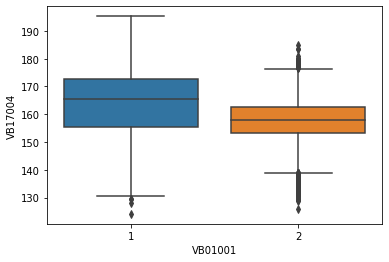

In [89]:
sns.boxplot(x = 'VB01001', y = 'VB17004', data = dados);

In [90]:
distribuicao_altura_m = dados.query('VB01001 == 1')['VB17004']
distribuicao_altura_f = dados.query('VB01001 == 2')['VB17004']

In [91]:
_, p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

In [92]:
_, p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)
p_value

1.0

In [93]:
_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)

print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [94]:
ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

#### Desafios

* Desafio 13: Estudar o que é intervalo de confiança, nível de confiança e o que é significância
* Desafio 14: Plotar o intervalo de confiança no histograma das alturas
* Desafio 15: Realizar os testes de hipóteses de outras colunas e explorar a base de dados

##### Desafio 13 - Intervalo, nível de confiança e nível de significância

##### Desafio 14 - Intervalo de Confiança e Distribuição das Alturas

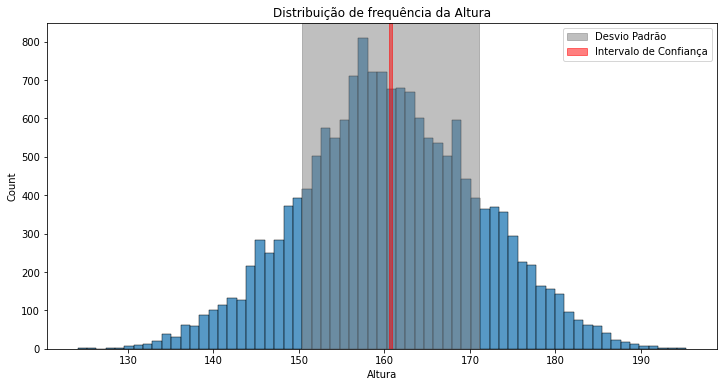

In [103]:
ax = sns.histplot(x = 'VB17004', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência da Altura')
ax.set_xlabel('Altura')

# acrescentando o desvio padrão
ax.axvspan(media-desvio_padrao, media+desvio_padrao, alpha=0.5,
           color='gray', label='Desvio Padrão')

# acrescentando o intervalo de confiança
ax.axvspan(ic[0], ic[1], alpha=0.5,
           color='red', label='Intervalo de Confiança')

ax.legend()

ax;

##### Desafio 15 - Testando outras hipóteses

In [96]:
distribuicao_idade_m = dados.query('VB01001 == 1')['VB01003']
distribuicao_idade_f = dados.query('VB01001 == 2')['VB01003']

_, p_value = ztest(distribuicao_idade_m, distribuicao_idade_f)
p_value

print('Hipótese nula: a média de idade de homens e mulheres é a mesma.\n')

if p_value <0.05:
  print(">>Hipótese nula rejeitada.")
else:
  print(">>Hipótese nula aceita.")

Hipótese nula: a média de idade de homens e mulheres é a mesma.

>>Hipótese nula rejeitada.


In [97]:
#idade que usou drogas pela primeira vez VB06002

# removendo -1 (pulo questionário) e 99 (não informado)
dados_filtrados = dados.query('VB06002 != -1 & VB06002 != 99')


distribuicao_drogas_m = dados_filtrados.query('VB01001 == 1')['VB06002']
distribuicao_drogas_f = dados_filtrados.query('VB01001 == 2')['VB06002']

_, p_value = ztest(distribuicao_drogas_m, distribuicao_drogas_f)

print('Hipótese nula: a média de idade que homens começaram a usar drogas '\
      'é a mesma para as mulheres.\n')

if p_value <0.05:
  print(">>Hipótese nula rejeitada.")
else:
  print(">>Hipótese nula aceita.")

Hipótese nula: a média de idade que homens começaram a usar drogas é a mesma para as mulheres.

>>Hipótese nula aceita.


#Testes

In [98]:
# foi forçado a ter relação
dados['VB09016'].value_counts()

 2     11195
-1      4706
 1       569
 99       86
Name: VB09016, dtype: int64

In [99]:
# foi forçado a ter relação pelo NAMORADO
dados['VB0901701'].value_counts()

-1     15987
 2       391
 1       174
 99        4
Name: VB0901701, dtype: int64

In [100]:
# foi forçado a ter relação pelo AMIGO
dados['VB0901702'].value_counts()

-1     15987
 2       446
 1       119
 99        4
Name: VB0901702, dtype: int64

In [101]:
# foi forçado a ter relação por PAI/MÃE
dados['VB0901703'].value_counts()

-1     15987
 2       497
 1        68
 99        4
Name: VB0901703, dtype: int64